In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from nltk import NaiveBayesClassifier
from nltk import classify
from nltk import MaxentClassifier

In [3]:
df = pd.read_csv('labelleddf.csv',sep='\t',header=0,index_col=0)
df.head()

,Sentence,prayer_or_nah
0,Share this with,0
1,Email,0
2,Facebook,0
3,Messenger,0
4,Messenger,0


In [4]:
fullset = [tuple(x) for x in df.to_records(index=False)]

In [5]:
fullset[:5]

[('Share this with', 0),
 ('Email', 0),
 ('Facebook', 0),
 ('Messenger', 0),
 ('Messenger', 0)]

In [6]:
random_set = random.sample(fullset, k=len(fullset)) #returns shuffled list

In [7]:
random_set[:5]

[('But the podcast never died, because the staunch podcast subscribers lived on\u200a—\u200aand now they’re laughing.',
  0),
 ('I was waiting with my signal ticking, ready to take a spot being vacated, when a car swooped in from the other direction and stole my spot.',
  0),
 ('We really care about our craft.', 0),
 ('Because of our weakness in this period between Jesus’s first and second comings, the Father has sent us another Helper.',
  0),
 ('And when we pray like this, it shows that our faith is not in governments or international human-rights declarations, but in God.',
  1)]

In [8]:
# random.shuffle(fullset) #shuffles in place

In [9]:
fullset[:5]

[('Share this with', 0),
 ('Email', 0),
 ('Facebook', 0),
 ('Messenger', 0),
 ('Messenger', 0)]

In [10]:
len(random_set)

372

In [11]:
def sentences_as_dict(word):
    return {'the_sentence': word}

In [12]:
sentences_as_dict('Facebook')

{'the_sentence': 'Facebook'}

In [13]:
featureset = [(sentences_as_dict(sentence), label) for (sentence, label) in random_set]

In [14]:
len(featureset)

372

In [15]:
featureset[0:10]

[({'the_sentence': 'But the podcast never died, because the staunch podcast subscribers lived on\u200a—\u200aand now they’re laughing.'},
  0),
 ({'the_sentence': 'I was waiting with my signal ticking, ready to take a spot being vacated, when a car swooped in from the other direction and stole my spot.'},
  0),
 ({'the_sentence': 'We really care about our craft.'}, 0),
 ({'the_sentence': 'Because of our weakness in this period between Jesus’s first and second comings, the Father has sent us another Helper.'},
  0),
 ({'the_sentence': 'And when we pray like this, it shows that our faith is not in governments or international human-rights declarations, but in God.'},
  1),
 ({'the_sentence': 'The greater this awareness is, the greater our sense of desperation for God’s help.'},
  0),
 ({'the_sentence': 'And what we ask God for tells us a lot about what we really want, and in what we hope.'},
  0),
 ({'the_sentence': 'Read a short devotional from John Piper for every day of the year.'},
 

In [55]:
train_set, test_set = featureset[100:], featureset[:100]

## Naive Bayes classifier:

In [33]:
nb_classifier = NaiveBayesClassifier.train(train_set)

In [36]:
nb_classifier.classify(sentences_as_dict('Facebook'))

0

In [37]:
nb_classifier.classify(sentences_as_dict('Will you pray for me?')) #False negative!!

0

In [38]:
classify.accuracy(nb_classifier, test_set)

0.79000000000000004

In [40]:
nb_classifier.show_most_informative_features() #Why doesn't it return anything?

Most Informative Features


## NaiveBayes 2nd iteration

In [65]:
nbc2_train_set, nbc2_test_set = random_set[100:], random_set[:100]

In [66]:
len(nbc2_train_set)

272

In [68]:
type(nbc2_train_set)

list

In [80]:
# from textblob import textblob as tb
# from textblob.classifiers import NaiveBayesClassifier

In [70]:
# cl = NaiveBayesClassifier(nbc2_train_set)

## Maximum Entropy Classifier:

In [70]:
me_classifier = MaxentClassifier.train(train_set)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.228
             2          -0.40547        1.000
             3          -0.28768        1.000
             4          -0.22314        1.000
             5          -0.18232        1.000
             6          -0.15415        1.000
             7          -0.13353        1.000
             8          -0.11778        1.000
             9          -0.10536        1.000
            10          -0.09531        1.000
            11          -0.08701        1.000
            12          -0.08004        1.000
            13          -0.07411        1.000
            14          -0.06899        1.000
            15          -0.06454        1.000
            16          -0.06062        1.000
            17          -0.05716        1.000
            18          -0.05407        1.000
            19          -0.05129        1.000
 

In [71]:
me_classifier.classify(sentences_as_dict('Facebook'))

0

In [72]:
me_classifier.classify(sentences_as_dict('Will you pray for me?')) #THIS IS BETTER.

1

In [73]:
classify.accuracy(me_classifier, test_set)

0.38

In [50]:
me_classifier.show_most_informative_features(5)

   6.644 the_sentence=='Sign up for notifications about new content:' and label is 0
   6.644 the_sentence=='Listen to John Piper answer tough theological and pastoral questions.' and label is 0
   6.644 the_sentence=='Watch John Piper mark the text on the screen, and learn to study the Bible for yourself.' and label is 0
   6.644 the_sentence=='Read a short devotional from John Piper for every day of the year.' and label is 0
   6.644 the_sentence=='But in his fully human nature, he had to pray to the Father just like we do.' and label is 1


# turning strings to vectors

In [16]:
import string
from nltk.corpus import stopwords

In [17]:
def text_process(mess):
    '''
    takes in a string
    1. remove punctuation
    2. remove stop words
    3. return a list of clean text words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc.split()
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
df.head()

,Sentence,prayer_or_nah
0,Share this with,0
1,Email,0
2,Facebook,0
3,Messenger,0
4,Messenger,0


In [19]:
df['Sentence'].head(30).apply(text_process)

0                                               [Share]
1                                               [Email]
2                                            [Facebook]
3                                           [Messenger]
4                                           [Messenger]
5                                             [Twitter]
6                                           [Pinterest]
7                                            [WhatsApp]
8                                            [LinkedIn]
9                                          [Copy, link]
10                 [external, links, open, new, window]
11    [man, armed, machete, forced, way, rural, home...
12    [Mr, Ruto, family, compound, near, western, ci...
13    [Specialist, troops, deployed, deal, intruder,...
14    [Earlier, reports, suggested, number, gunmen, ...
15    [circumstances, yet, unclear, hit, officer, du...
16                             [also, reports, gunfire]
17    [wounded, police, officer, stable, conditi

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Sentence'])

In [22]:
print(len(bow_transformer.vocabulary_))

1510


In [23]:
sent30 = df['Sentence'][29]

In [24]:
print(sent30)

But that’s a story for another day.


In [25]:
bow30 = bow_transformer.transform([sent30])

In [26]:
print(bow30)

  (0, 303)	1
  (0, 493)	1
  (0, 1286)	1
  (0, 1329)	1


In [27]:
bow_transformer.get_feature_names()[1329]

'that’s'

In [28]:
sentences_bow = bow_transformer.transform(df['Sentence']) #need to add tranform to df

In [29]:
print('Shape of the Sparse Matrix: ', sentences_bow.shape)

Shape of the Sparse Matrix:  (372, 1510)


In [30]:
sparsity = (100.0 * sentences_bow.nnz/(sentences_bow.shape[0] * sentences_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.5160934273303425


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tfidf_transformer = TfidfTransformer().fit(sentences_bow)

In [33]:
tfidf30 = tfidf_transformer.transform(bow30)

In [34]:
print(tfidf30)

  (0, 1329)	0.526638158102
  (0, 1286)	0.563309056216
  (0, 493)	0.417748975886
  (0, 303)	0.480438290275


In [35]:
sentences_tfidf = tfidf_transformer.transform(sentences_bow)

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
prayer_talk_detect_model = MultinomialNB().fit(sentences_tfidf, df['prayer_or_nah'])

In [38]:
prayer_talk_detect_model.predict(tfidf30)[0]

0

In [39]:
df['prayer_or_nah'][29]

0

In [40]:
all_pred = prayer_talk_detect_model.predict(sentences_tfidf)

In [41]:
all_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1,

# Multinomial Naive Bayes Pipeline + Classification Results

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
sent_train, sent_test, label_train, label_test = train_test_split(df['Sentence'],df['prayer_or_nah'],test_size = 0.3)

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [46]:
pipeline.fit(sent_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x10d75e6a8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
predictions = pipeline.predict(sent_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

          0       0.77      1.00      0.87        79
          1       1.00      0.27      0.43        33

avg / total       0.84      0.79      0.74       112



# Random Forest Pipeline + Classification Results

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [52]:
rf_pipeline.fit(sent_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x10d75e6a8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [53]:
rf_predictions = rf_pipeline.predict(sent_test)

In [54]:
print(classification_report(label_test,rf_predictions))

             precision    recall  f1-score   support

          0       0.83      0.99      0.90        79
          1       0.94      0.52      0.67        33

avg / total       0.86      0.85      0.83       112



# DEMO

In [102]:
# me_classifier.classify(sentences_as_dict('Facebook'))

In [103]:
# me_classifier.classify(sentences_as_dict('Twitter'))

In [104]:
# me_classifier.classify(sentences_as_dict('Will you pray for me?'))

In [ ]:
#------end of demo------

In [75]:
#rf_predictions = rf_pipeline.predict('Facebook')

In [65]:
#demo_rf_classifier = RandomForestClassifier(train_set)

In [76]:
#demo_rf_classifier.classify(sentences_as_dict('Facebook'))

In [ ]:
#rf_predictions = rf_pipeline.predict()

In [63]:
#demo_rf_classifier = RandomForestClassifier(train_set)

In [77]:
#demo_rf_classifier(sentences_as_dict('Will you pray for me?'))

# EDA + Random Forest

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

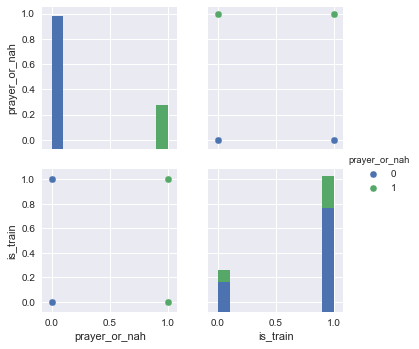

In [82]:
sns.pairplot(df, hue = 'prayer_or_nah')

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df.drop('prayer_or_nah',axis=1)

In [86]:
y = df['prayer_or_nah']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtree = DecisionTreeClassifier()

In [91]:
dtree.fit(X_train,y_train)

ValueError: could not convert string to float: 'Jesus also says we do not have, because we do not ask long enough (Luke 11:5–13).'

# random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf = RandomForestClassifier(n_jobs=2)

In [53]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

In [54]:
df.head()

,Sentence,prayer_or_nah,is_train
0,Share this with,0,True
1,Email,0,True
2,Facebook,0,True
3,Messenger,0,True
4,Messenger,0,True


In [55]:
forest_train, forest_test = df[df['is_train']==True], df[df['is_train']==False]

In [56]:
print('Number of observations in the training data:', len(forest_train))
print('Number of observations in the test data:',len(forest_test))

Number of observations in the training data: 284
Number of observations in the test data: 88


In [61]:
features = df.columns[:1]

In [62]:
features

Index(['Sentence'], dtype='object')

In [71]:
# clf.fit(forest_train[features], forest_train['prayer_or_nah'])